In [1]:
import sys
import numpy as np
from astropy.io import fits
from astroscrappy import detect_cosmics
from matplotlib import pyplot as plt 
sys.path.append('aspired')

import twodspec

In [2]:
# Example data from SPRAT
# LHS6328 companion WD
sprat_data = fits.open('examples/v_e_20190522_8_1_0_9.fits')[0].data

aspired/twodspec.py:97: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


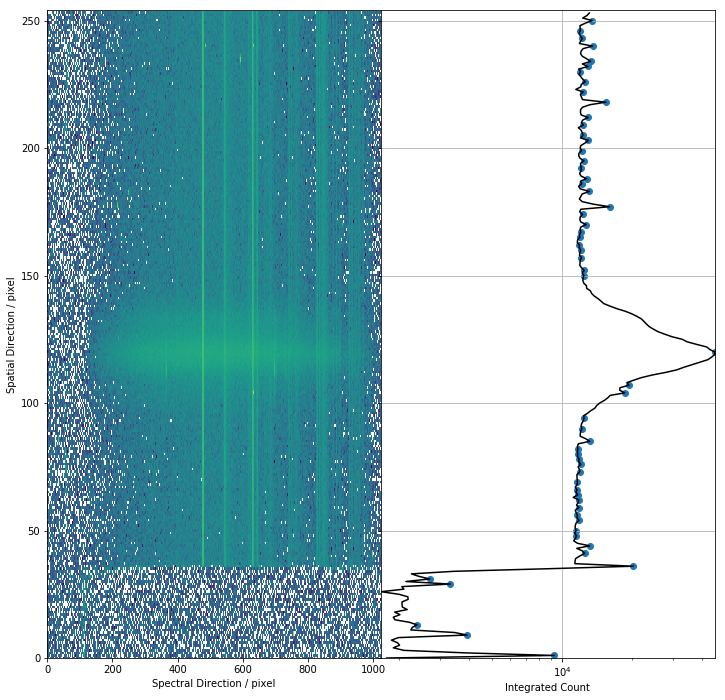

In [3]:
# (1) example of twodspec._find_peaks() without cosmic ray removal

# Set the spectral and spatial direction
Saxis = 1
Waxis = 0

# get the length in the spectral and spatial directions
spec_size = np.shape(sprat_data)[Waxis]
spatial_size = np.shape(sprat_data)[Saxis]

# the valid y-range of the chip (an array of int)
ydata = np.arange(spec_size)
ztot = np.sum(sprat_data, axis=Saxis)

peaks_y, heights_y = twodspec._find_peaks(sprat_data, spec_size, spatial_size, ydata, ztot, f_height=0.05, display=True)

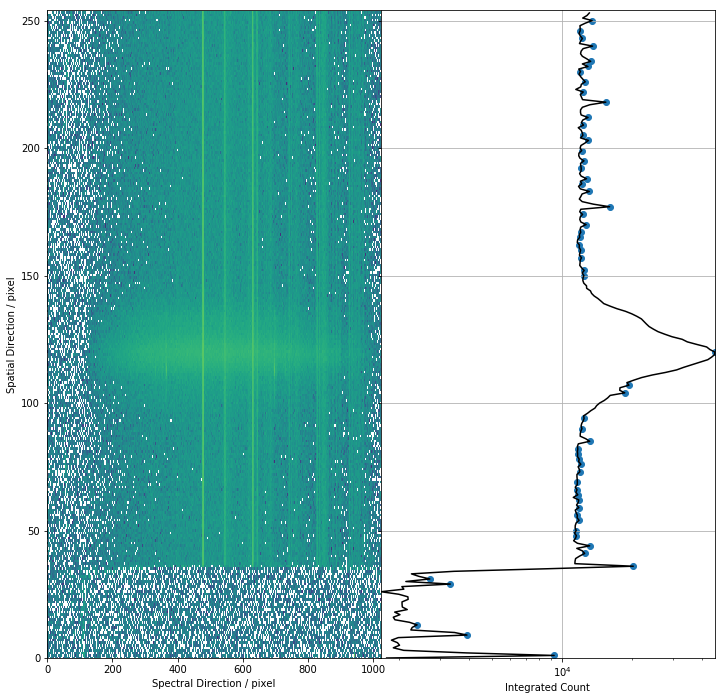

In [4]:
# (2) example of twodspec._find_peaks() with cosmic ray removal
#     Note that the CR removal keeps the emission lines
peaks_y, heights_y = twodspec._find_peaks(detect_cosmics(sprat_data)[1], spec_size, spatial_size, ydata, ztot, f_height=0.05, display=True)

Tracing Aperture using nsteps=20


aspired/twodspec.py:210: RuntimeWarning: invalid value encountered in log10
  np.log10(img),


Spectrum 1 : Trace gaussian width = [6.55041558 7.09643466 6.69876611 6.6009557  6.52707421 6.74108356
 6.33797016 6.24782212 6.19414874 6.12429255 5.91657497 6.15572322
 6.76152143 5.79729721 5.56858621 5.5536915  5.65416605 5.94833512
 4.28225338 0.        ] pixels
Spectrum 2 : Trace gaussian width = [6.94349314 7.6782685  7.35840539 7.15939866 7.10556665 7.2095613
 6.82848906 6.7462449  6.62776947 6.58133602 6.33233023 6.55893979
 7.18555598 6.25611603 5.97288238 5.8853212  5.82418138 6.56913636
 4.32608642 0.        ] pixels
Spectrum 3 : Trace gaussian width = [7.18759374 7.32279101 7.16427119 6.91062126 6.93200854 7.03982678
 6.660586   6.53527722 6.46602219 6.48226641 6.26383656 6.50933574
 7.07277387 6.26219861 6.01532048 5.99402898 5.87563843 6.70542701
 4.62889246 0.        ] pixels
Step 4 of 20 of spectrum 4 of 7 has a poor fit. Initial guess is used instead.
Step 5 of 20 of spectrum 4 of 7 has a poor fit. Initial guess is used instead.
Step 6 of 20 of spectrum 4 of 7 has a p

/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


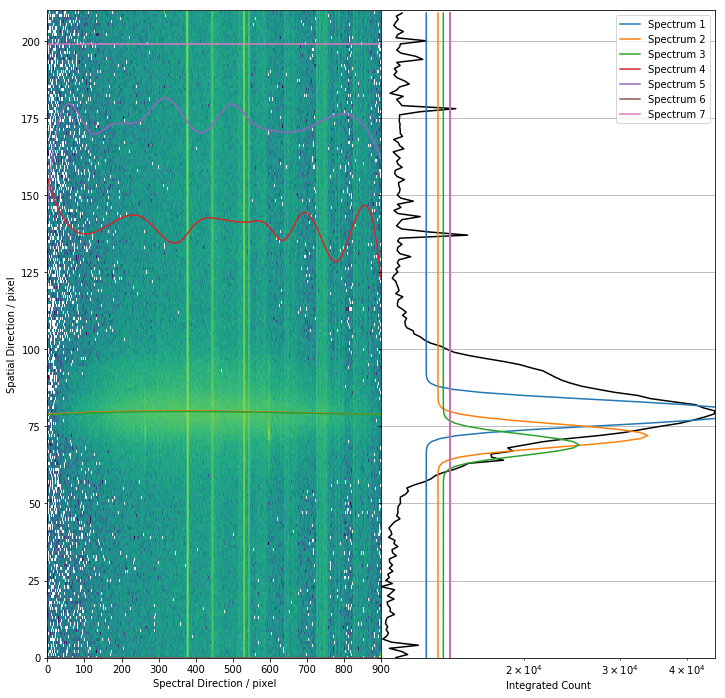

In [5]:
# (3) example of twodspec.ap_trace() with cosmic ray removal, selecting the 7 brightest spectra
#     in the pixel range covered by spatial_mask and spec_mask.
#     The emission line can be identified by the peak finding algorithm, but a continuum cannot
#     be traced because there is not one! The row number of the orange gaussian can be noted
#     and use it for aperture extraction.

spatial_mask = np.arange(40,250)
spec_mask = np.arange(100,1000)

my, y_sigma = twodspec.ap_trace(sprat_data, nsteps=20, spatial_mask=spatial_mask, spec_mask=spec_mask,
                                cosmic=True, n_spec=7, recenter=False, prevtrace=(0, ), bigbox=8, Saxis=1,
                                nomessage=False, display=True)

aspired/twodspec.py:476: RuntimeWarning: invalid value encountered in log10
  min(median_trace+widthup+skysep+skywidth, len(img[0])), :]),


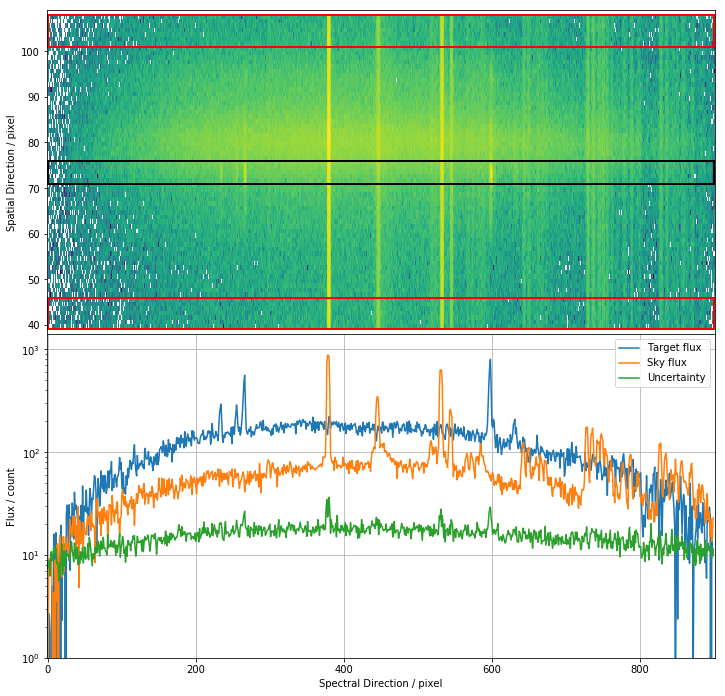

In [6]:
# Spectrum with only emission lines a special case where the continuum cannot be traced.
# Users have to supply row numbers.
spec, sky, err = twodspec.ap_extract(
    sprat_data,
    np.ones(len(spec_mask))*74.,
    spatial_mask=spatial_mask,
    spec_mask=spec_mask,
    apwidth=2,
    skysep=25,
    display=True)